## Reference

* [Creating a Spatial Database](https://postgis.net/workshops/postgis-intro/creating_db.html)
* [Loading spatial data](https://postgis.net/workshops/postgis-intro/loading_data.html)
* [What is Entity Relationship Diagram (ERD)?](https://www.visual-paradigm.com/guide/data-modeling/what-is-entity-relationship-diagram/)

## What Can PostgreSQL/PostGIS Offer You?

1. **Integration with Statistical Tools**
   - `PostgreSQL`/`PostGIS` can seamlessly integrate with statistical packages like `R`, enabling you to write database procedures in `Procedural Language(PL)/R`.
   - Extend functionality further with `PL/Python` or `PL/JavaScript`, allowing direct interaction between spatial data and your favorite programming environments.

2. **Spatial Analysis Beyond GIS**
   - While traditionally seen as a tool for `Geographic Information Systems (GIS)`, `PostGIS` excels in spatial analysis.
   - Spatial analysis explores space and use of space, such as:
     - Mapping undefined or unconventional locations (e.g., brain regions or nuclear plant sites).
     - Visualizing complex, inherently non-visual models (e.g., process modeling).

3. **Built-in Statistical Power**
   - Relational databases are ideal for managing large volumes of data, offering built-in `statistical/rollup functions` for quick summaries and detailed analyses.
   - `PostGIS` enhances spatial data visualization and analysis by adding geographic context to your research.

4. **Ease of Data Collection**
   - `PostGIS` supports data input from sources like `GPS`, remote sensing devices, and `IoT systems`.
   - With the decreasing cost of data collection tools like smartphones and drones, `PostGIS` helps process and store this data efficiently for scientific research.

5. **Data Distribution Made Simple**
   - Use `PostGIS` to create `datamarts` or `data dispensers` for:
     - Easy sharing of research data subsets.
     - Public downloads for broader accessibility.


## Database and Spatial Database

### What's Database

- A `database` organizes and stores data for **efficient management** in support for multiple uses.

- A `database` is an **abstraction of reality**.
  - A `database life cycle` is like a life cycle for software engineering design and consists of the following **six stages**, and it's called **the waterfall model**
    1. **`Analysis`** of objectives and user requirements: data and function
    2. **`Design`** of a database: conceptual design, logical design, and physical design
    3. **`Implementation`** of a database management system (`DBMS`): installation of software, populating data, customizing user interface
    4. **`Testing`** usability, applications, and liability
    5. **`Development`**
    6. **`Maintenance`** of hardware, software, data, and applications

    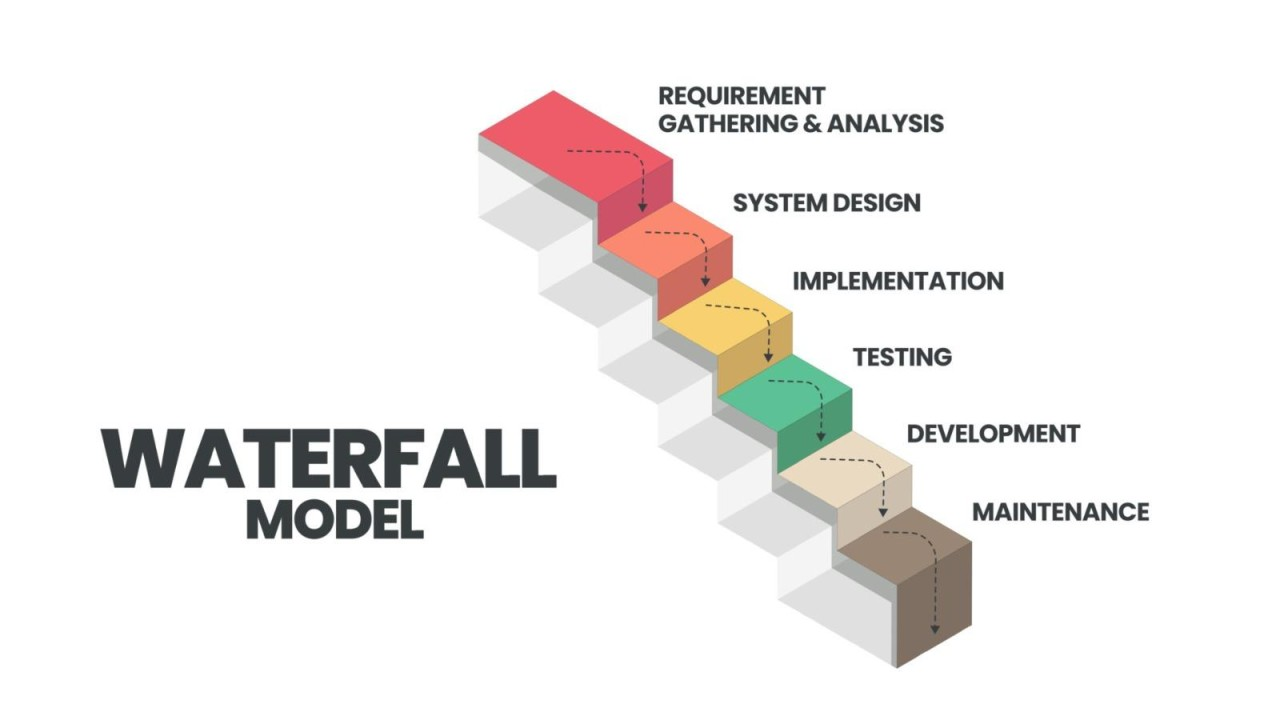

- A `database` specifies what data can be stored, the systematic encoding (e.g. `data structure`) and organization (e.g. `data model`) of the data, and functions for data management.
  - **`Data model`**: representation of reality
  
  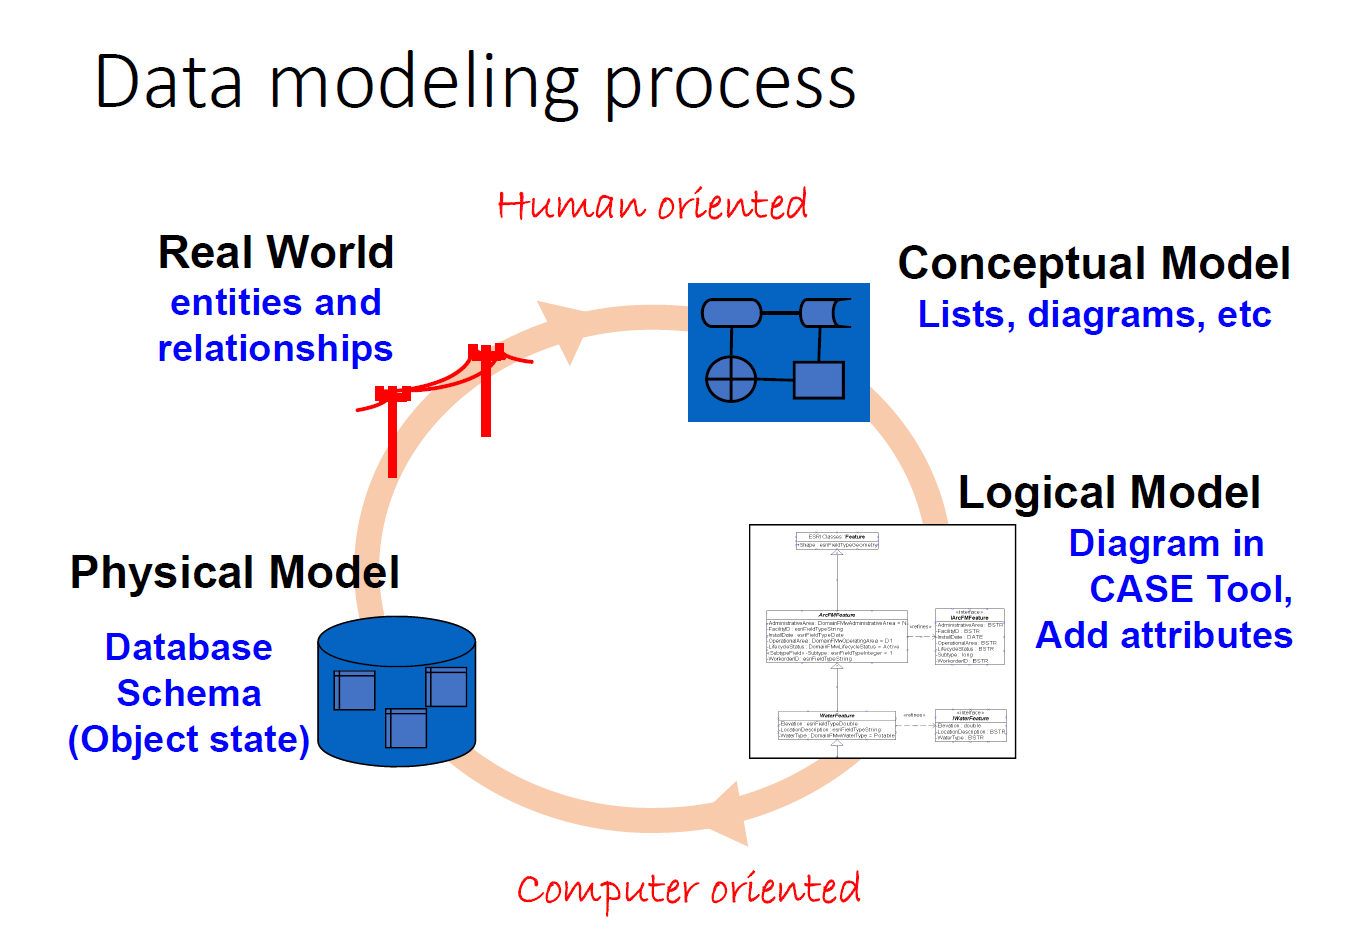

    - The stage of `conceptual database design` creates a `conceptual data model`, such as `Entity-Relationship (ER) diagrams`.
      - A `relationship` describes the association between two `entities`.
      - Relationships have `cardinality` that defines the number of instances from one entity associated with the number of instances in the other entity.
        1. one to one
        2. one to many
        3. many to many
        
        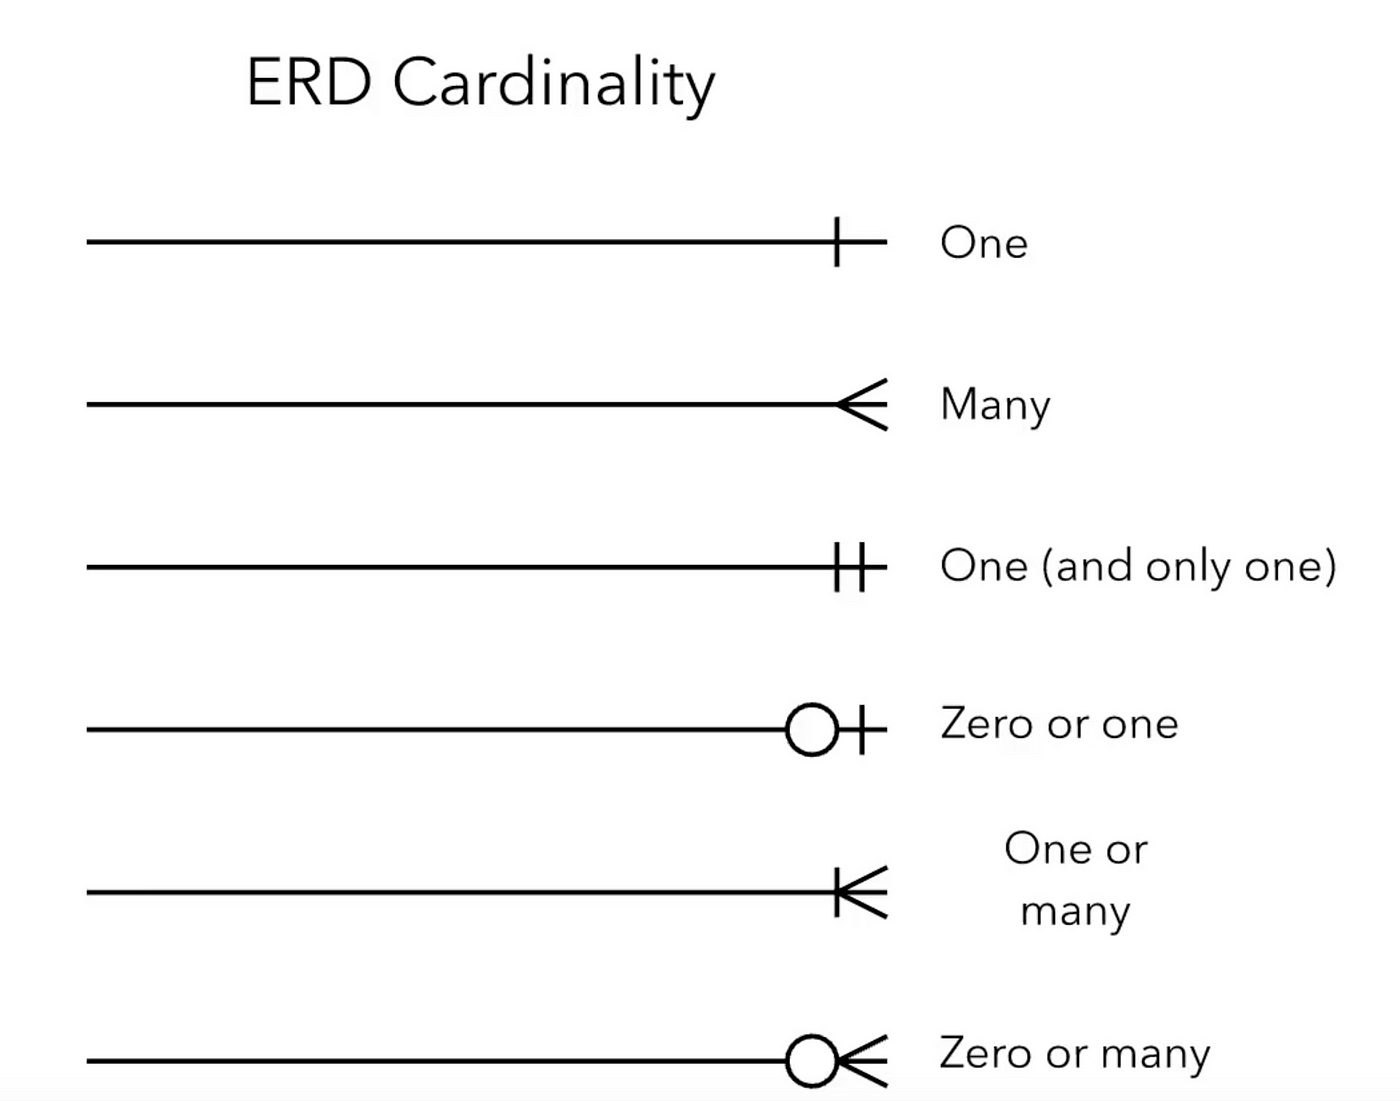

    - Example of `ERD`
  
        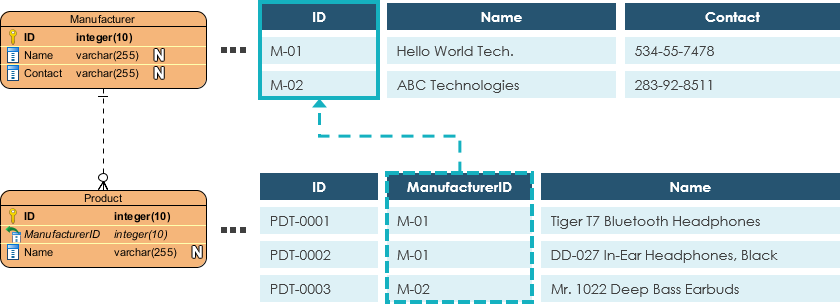

  - **`Data schema`**: data organization and classification
  - **`Data structure`**: organizing (i.e., indexing) and encoding (i.e., ordering) of data values (linked lists, arrays, trees, graphs, hashing, etc.). 
    - In `GIS`, data structures also include `spatial partitioning`.
  - **`Data type`**: the type of data values: integers, floats, text (or `char`), points, lines, polygons, multi-polygons, rings, `BLOB`, etc.
    - Three fundamental dataset types in a `geodatabase`
    
    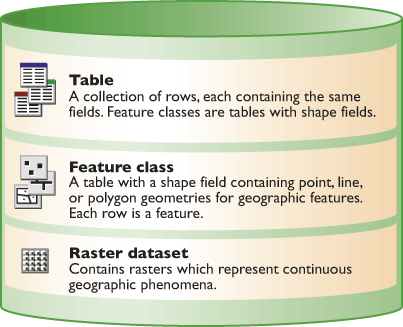

- A database management system shall include a `data definition language (DDL)` and a `data manipulation language (DML)`.
  - `Relational database management systems (RDBMS)` commonly use `structural query language (SQL)` for both `DDL` to `create`, `drop`, `alter`, `truncate`, `rename` a table and `DML` to `select`, `insert`, `update`, and `delete` data entries.

### Spatial Database

- `Spatial database`s are not just databases containing spatial data; they explicitly include **location information with 2D or 3D coordinates**.
  - The 2D or 3D coordinates make possible spatial representation of the information, and the spatial information enable the **calculation of spatial measurements** (e.g. `geometry`) and **spatial relationships** (e.g. `topology`).

## Setting Up Your First Spatial Database

###  Creating a Database Using `psql` (Command Line)

1. Step 1: Create the Database
   
    - The first step is to create a new database. Open your `psql` and run the following command:

    - This command creates a new database called `postgis_in_action`. You can name it anything, but keeping names meaningful helps with organization.
  
    ```sql
    CREATE DATABASE postgis_in_action;
    ```

2. Step 2: Connect to the Database

   - Once the database is created, connect to it by typing:
  
   - This command switches your session to the newly created database. You’re now ready to enable `PostGIS`.

    ```sql
    \connect postgis_in_action
    ```


3. Step 3: Enable PostGIS
   
   - To enable PostGIS, run the following commands:


    ```sql
    CREATE SCHEMA postgis;
    GRANT USAGE ON schema postgis TO public;
    CREATE EXTENSION postgis SCHEMA postgis;
    ALTER DATABASE postgis_in_action SET search_path=public,postgis,contrib;

    ```

- Explanation of Commands:

  - `CREATE SCHEMA postgis`: This creates a separate namespace, or "schema," within the database to store `PostGIS`-related functions and data.
  
  - `GRANT USAGE ON schema postgis TO public`: This grants all database users access to the `PostGIS` schema.
  
  - `CREATE EXTENSION postgis SCHEMA postgis`: Installs the `PostGIS` extension and places its components in the `postgis` schema.
  
  - `ALTER DATABASE postgis_in_action SET search_path=public,postgis,contrib`: Sets the default search path, ensuring `PostGIS` functions and data types are easily accessible without needing to specify the schema every time.

- Why Add to Search Path?

    The `search path` determines the order in which `PostgreSQL` looks for objects (tables, functions, etc.) when they are referenced in queries. By including `postgis` in the `search path`, you ensure `PostGIS` functions are always found without explicitly prefixing them with `postgis.` in your queries.


### Creating a Database Using `pgAdmin`

If you prefer a graphical user interface, you can use `pgAdmin` to create the database and enable `PostGIS`. Follow these steps:

1. Step 1: Create the Database

     1. Open `pgAdmin` and log in to your `PostgreSQL` server.
     2. Right-click on `Databases` in the tree view and select `Create > Database`.
     3. Enter `postgis_in_action` as the database name and click `Save`.

    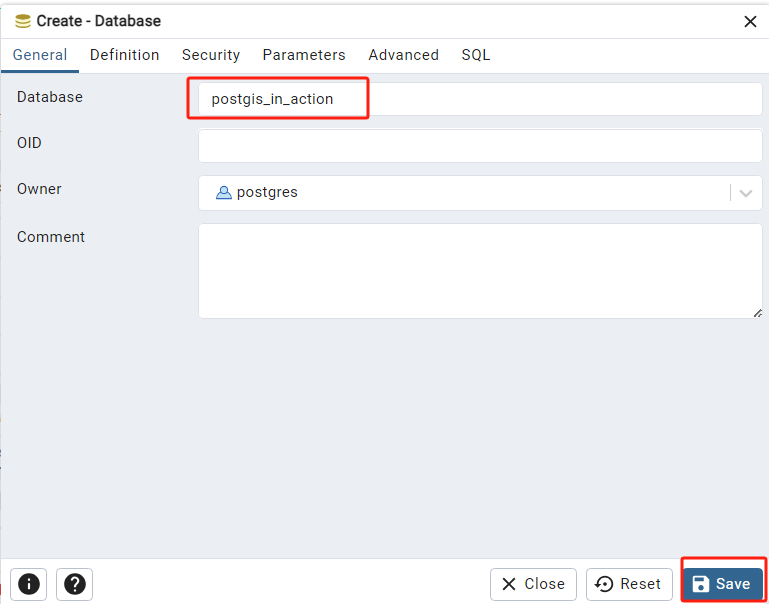

2. Step 2: Enable PostGIS

     1. Connect to your new database by refreshing the tree and selecting it.
     2. Open the query tool (`SQL Editor`) and run the following commands:

    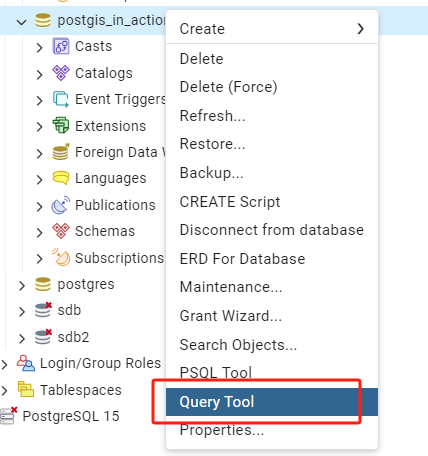

    ```sql
    CREATE SCHEMA postgis;
    GRANT USAGE ON schema postgis TO public;
    CREATE EXTENSION postgis SCHEMA postgis;
    ALTER DATABASE postgis_in_action SET search_path=public,postgis,contrib;
    ```

3. Step 3: Verify Installation
   
   1. Refresh the database tree.
   2. Navigate to `Schemas > postgis > Functions` to see a list of PostGIS functions.

    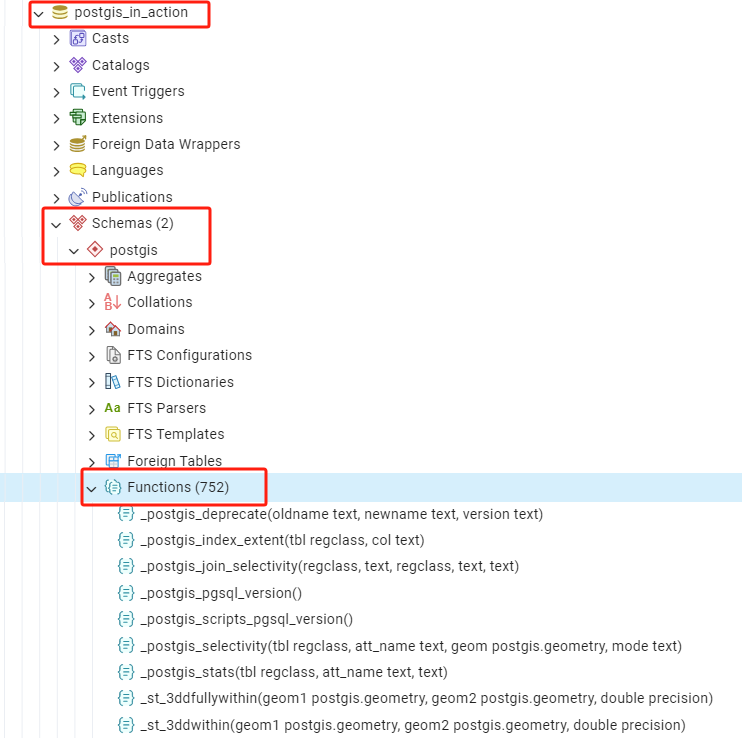


## Loading spatial data and table

### Importing the Shapefile using `PostGIS Shapefile Import/Export Manager`

1. Step 1: Open the Shapefile Import/Export Manager

   1. Open `pgAdmin` and connect to your `PostgreSQL` database (`postgis_in_action`).
   2. In the toolbar, look for `PostGIS Shapefile Import/Export Manager`. If you don’t see it, ensure you’ve installed the `PostGIS` extension correctly.

    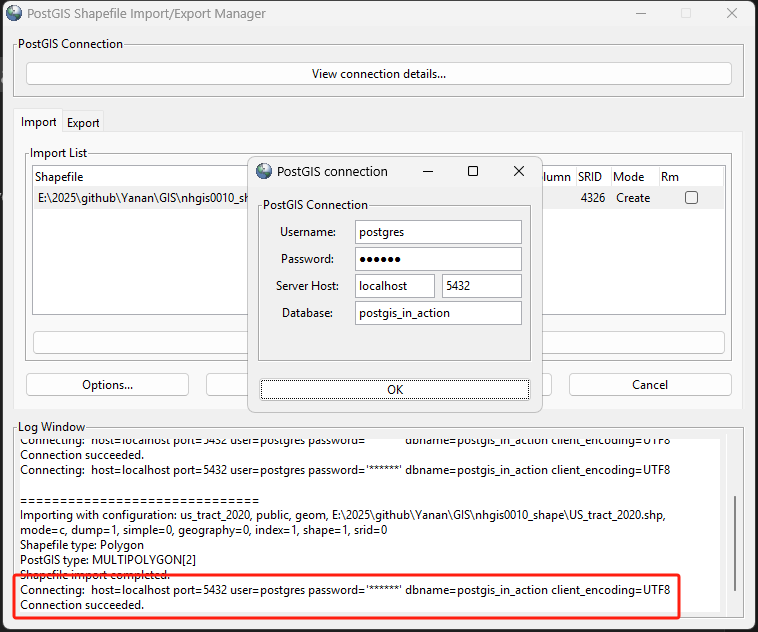

2. Step 2: Import the Shapefile

   1. Open the `Shapefile Import/Export Manager`.
   2. In the `Shapefile` field, browse and select `US_tract_2020.shp`.
   3. Set the `SRID` to `102003` and `Geo Column` to `geometry` (or the `SRID` and `Geo Column` match your shapefile).
   4. Choose a target schema (e.g., `postgis`) and set a table name (e.g., `us_tracts`).
   5. Click `Import`. The tool will:
      - Create a new table.
      - Insert shapefile data into the table.
      - Create a spatial index for faster querying.

    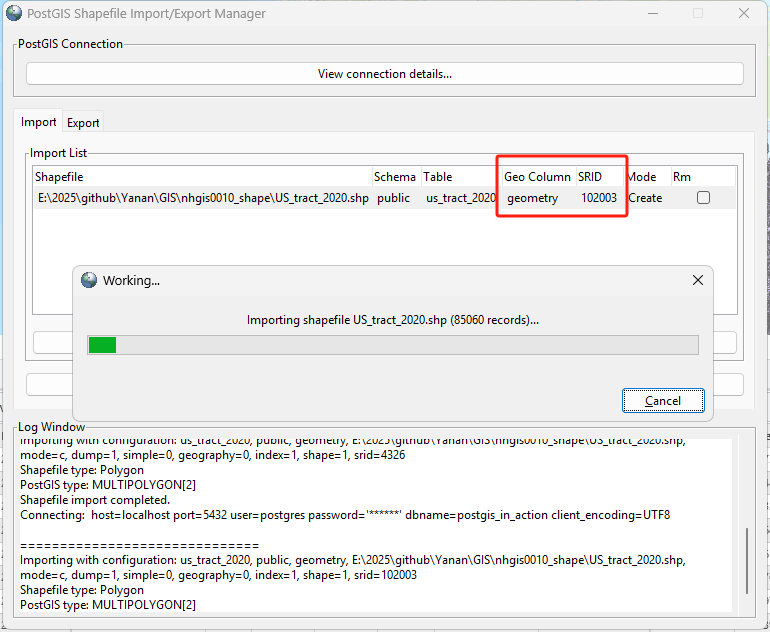

3. Step 3: Verify the Import

    Check if the shapefile was imported successfully:
    1. Open the query tool in `pgAdmin`.
    2. Run the following query:
    ```sql
    SELECT * FROM us_tract_2020 LIMIT 5;
    ```
    

###  Importing the CSV File

1. Step 1: Create the Table

   1. This SQL script defines the `schema` for the data described in the metadata:

    ```sql
    CREATE TABLE nhgis_tract_data (
        GEO_ID VARCHAR(20) PRIMARY KEY, -- Census Geographic Area Identifier (Primary Key)
        GISJOIN VARCHAR(20), -- GIS Join Match Code
        "YEAR" VARCHAR(10), -- Data File Year (2018-2022)
        STUSAB VARCHAR(20), -- State Abbreviation
        STATE VARCHAR(50), -- State Name
        STATEA VARCHAR(50), -- State Code
        COUNTY VARCHAR(50), -- County Name
        COUNTYA INTEGER, -- County Code
        TRACTA VARCHAR(20), -- Census Tract Code
        TL_GEO_ID VARCHAR(20), -- TIGER/Line Shapefile Geographic Area Identifier
        NAME_E VARCHAR(255), -- Full Geographic Area Name (Estimates)
        AQNFE001 INTEGER, -- Total Population
        AQNGE001 INTEGER, -- Total Race Population
        AQNGE002 INTEGER, -- White Population
        AQNGE003 INTEGER, -- Black or African American Population
        AQNGE004 INTEGER, -- American Indian/Alaska Native Population
        AQNGE005 INTEGER, -- Asian Population
        AQNGE006 INTEGER, -- Native Hawaiian/Other Pacific Islander Population
        AQNGE007 INTEGER, -- Some Other Race Population
        AQNGE008 INTEGER, -- Two or More Races Population
        AQNGE009 INTEGER, -- Two Races Including Some Other Race
        AQNGE010 INTEGER, -- Two Races Excluding Some Other Race
        AQPKE001 INTEGER, -- Total Population (Educational Attainment)
        AQPKE002 INTEGER, -- No Schooling Completed
        AQPKE003 INTEGER, -- Nursery School
        AQPKE004 INTEGER, -- Kindergarten
        AQPKE005 INTEGER, -- 1st Grade
        AQPKE006 INTEGER, -- 2nd Grade
        AQPKE007 INTEGER, -- 3rd Grade
        AQPKE008 INTEGER, -- 4th Grade
        AQPKE009 INTEGER, -- 5th Grade
        AQPKE010 INTEGER, -- 6th Grade
        AQPKE011 INTEGER, -- 7th Grade
        AQPKE012 INTEGER, -- 8th Grade
        AQPKE013 INTEGER, -- 9th Grade
        AQPKE014 INTEGER, -- 10th Grade
        AQPKE015 INTEGER, -- 11th Grade
        AQPKE016 INTEGER, -- 12th Grade, No Diploma
        AQPKE017 INTEGER, -- Regular High School Diploma
        AQPKE018 INTEGER, -- GED or Alternative Credential
        AQPKE019 INTEGER, -- Some College, Less Than 1 Year
        AQPKE020 INTEGER, -- Some College, 1 or More Years, No Degree
        AQPKE021 INTEGER, -- Associate’s Degree
        AQPKE022 INTEGER, -- Bachelor’s Degree
        AQPKE023 INTEGER, -- Master’s Degree
        AQPKE024 INTEGER, -- Professional School Degree
        AQPKE025 INTEGER, -- Doctorate Degree
        NAME_M VARCHAR(255), -- Full Geographic Area Name (Margins of Error)
        AQNGM002 INTEGER, -- White Alone (Margin of Error)
        AQNGM003 INTEGER, -- Black or African American Alone (Margin of Error)
        AQNGM004 INTEGER, -- American Indian/Alaska Native Alone (Margin of Error)
        AQNGM005 INTEGER, -- Asian Alone (Margin of Error)
        AQNGM006 INTEGER, -- Native Hawaiian/Other Pacific Islander Alone (Margin of Error)
        AQNGM007 INTEGER, -- Some Other Race Alone (Margin of Error)
        AQNGM008 INTEGER, -- Two or More Races (Margin of Error)
        AQNGM009 INTEGER, -- Two Races Including Some Other Race (Margin of Error)
        AQNGM010 INTEGER, -- Two Races Excluding Some Other Race (Margin of Error)
        AQPKM001 INTEGER, -- Total Population (Margin of Error)
        AQPKM002 INTEGER, -- No Schooling Completed (Margin of Error)
        AQPKM003 INTEGER, -- Nursery School (Margin of Error)
        AQPKM004 INTEGER, -- Kindergarten (Margin of Error)
        AQPKM005 INTEGER, -- 1st Grade (Margin of Error)
        AQPKM006 INTEGER, -- 2nd Grade (Margin of Error)
        AQPKM007 INTEGER, -- 3rd Grade (Margin of Error)
        AQPKM008 INTEGER, -- 4th Grade (Margin of Error)
        AQPKM009 INTEGER, -- 5th Grade (Margin of Error)
        AQPKM010 INTEGER, -- 6th Grade (Margin of Error)
        AQPKM011 INTEGER, -- 7th Grade (Margin of Error)
        AQPKM012 INTEGER, -- 8th Grade (Margin of Error)
        AQPKM013 INTEGER, -- 9th Grade (Margin of Error)
        AQPKM014 INTEGER, -- 10th Grade (Margin of Error)
        AQPKM015 INTEGER, -- 11th Grade (Margin of Error)
        AQPKM016 INTEGER, -- 12th Grade, No Diploma (Margin of Error)
        AQPKM017 INTEGER, -- Regular High School Diploma (Margin of Error)
        AQPKM018 INTEGER, -- GED or Alternative Credential (Margin of Error)
        AQPKM019 INTEGER, -- Some College, Less Than 1 Year (Margin of Error)
        AQPKM020 INTEGER, -- Some College, 1 or More Years, No Degree (Margin of Error)
        AQPKM021 INTEGER, -- Associate’s Degree (Margin of Error)
        AQPKM022 INTEGER, -- Bachelor’s Degree (Margin of Error)
        AQPKM023 INTEGER, -- Master’s Degree (Margin of Error)
        AQPKM024 INTEGER, -- Professional School Degree (Margin of Error)
        AQPKM025 INTEGER -- Doctorate Degree (Margin of Error)
    );

    ```

2. Step 2: Import the CSV File using `pgAdmin`
   
   1. Open `pgAdmin` and connect to your database (`postgis_in_action`).
   2. Navigate to the `nhgis_tract_data` table.
   3. Right-click on the table and select `Import/Export`.
   4. Choose the file format as `CSV`, select the file path, and check the Header option.
   5. Click `OK` to load the data.


    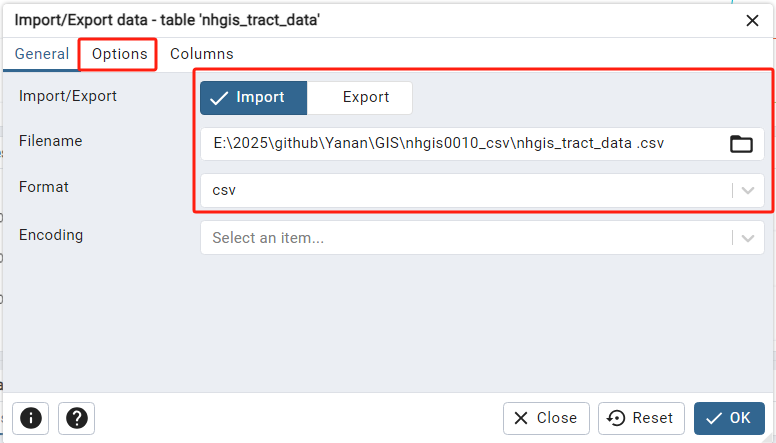


3. Step 3: Verify the Import

    Run the following query to confirm the data has been successfully imported:
    ```sql
    SELECT * FROM nhgis_tract_data LIMIT 10;
    ```

## Basic SQL

- [Reference](https://www.youtube.com/watch?v=yMqldbY2AAg&t=4s&ab_channel=ByteByteGo)

`SQL (Structured Query Language)`: `SQL` is a standard language for managing relational databases. It provides a set of commands for performing various operations such as querying data, updating data, creating and modifying database schema, and managing access controls.

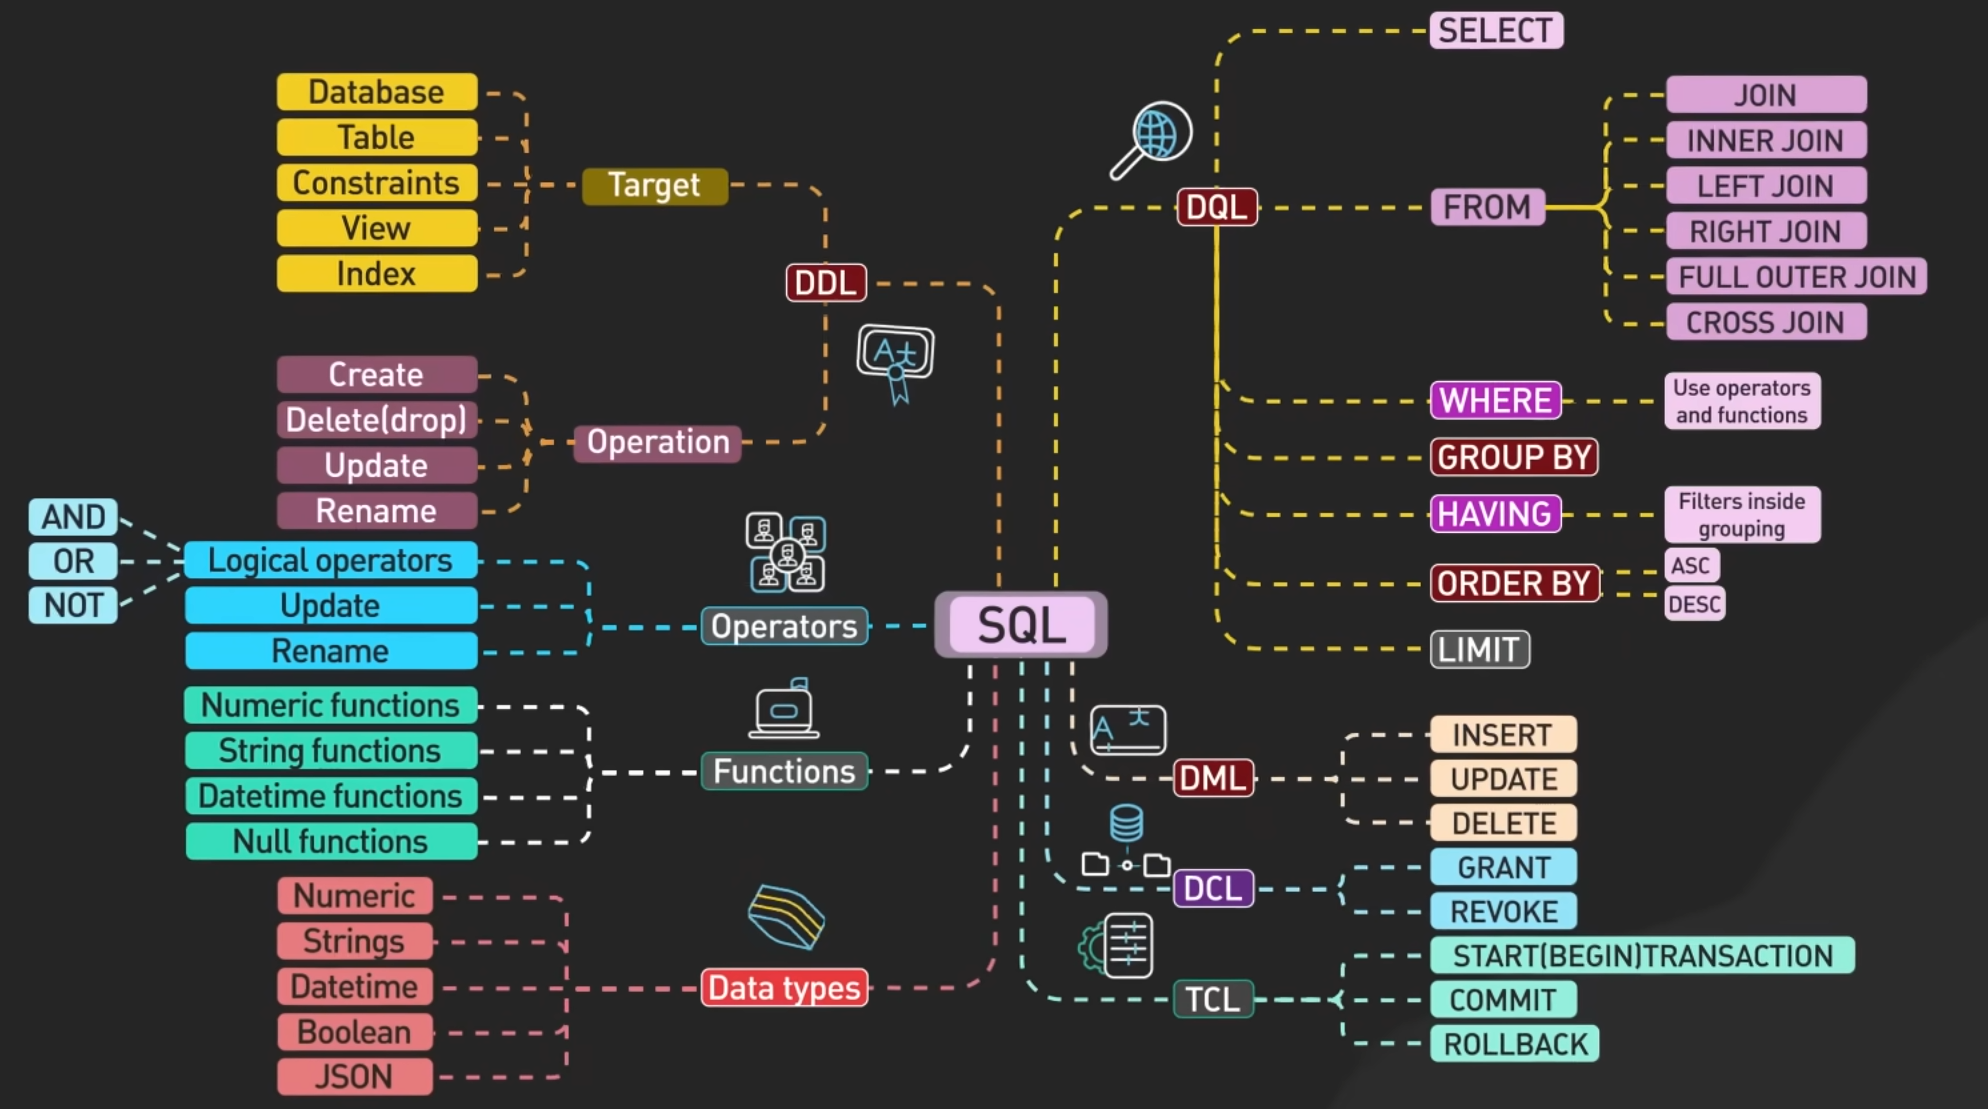


### Key Types in SQL

#### Numeric Types

- `INTEGER` (or `INT`): Represents whole numbers.

- `NUMERIC` (or `DECIMAL`): Represents fixed-point numbers with exact precision.

  ```sql
    CREATE TABLE Products (
        ProductID SERIAL PRIMARY KEY, -- Auto-incrementing integer
        Price NUMERIC(10, 2) -- Fixed-point number with 10 digits in total, 2 after the decimal
    );
  ```

#### String Types

- `VARCHAR`: Represents variable-length character strings with a maximum length specified.
- `TEXT`: Represents variable-length character strings with a maximum length that can be extremely large.

  ```sql
    CREATE TABLE Customers (
        CustomerID SERIAL PRIMARY KEY, -- Auto-incrementing integer
        FirstName VARCHAR(50), -- Variable-length string up to 50 characters
        LastName VARCHAR(50), -- Variable-length string up to 50 characters
        Address TEXT -- Large variable-length text
    );
  ```

#### Date/Time Types

- `DATE`: Represents a date value without time.
- `TIMESTAMP`: Represents date and time values.

  ```sql
    CREATE TABLE Orders (
        OrderID SERIAL PRIMARY KEY, -- Auto-incrementing integer
        OrderDate DATE, -- Date only (e.g., '2025-01-01')
        LastUpdated TIMESTAMP DEFAULT CURRENT_TIMESTAMP -- Date and time, with a default value
    );
  ```

#### Boolean Type

- `BOOLEAN`: Represents a boolean value (`TRUE`, `FALSE`, or `NULL`).
  ```sql
    CREATE TABLE Employees (
        EmployeeID SERIAL PRIMARY KEY, -- Auto-incrementing integer
        IsActive BOOLEAN DEFAULT TRUE -- Boolean value, with a default of TRUE
    );
  ```

### Database normalization

`Database normalization` is a process used to organize a relational database into tables and columns to **minimize `redundancy` and `dependency`**. It aims to reduce data anomalies such as insertion, update, and deletion anomalies, which can occur when data is not properly organized.

Let's illustrate normalization with a simple example:

Suppose we have a database to store information about `students` and the `courses` they are enrolled in. Initially, we might design a single table like this:

**StudentCourses Table:**

| StudentID | StudentName | Course1   | Course2 | Course3   |
| --------- | ----------- | --------- | ------- | --------- |
| 1         | Alice       | Math      | Physics | Chemistry |
| 2         | Bob         | Physics   | Biology |           |
| 3         | Carol       | Chemistry |         |           |

In this table, each row represents a `student`, and each column represents a `course` they are enrolled in. However, this table violates the principles of normalization because:

1. **Data Redundancy**: The **`course` names are repeated in multiple rows**, leading to redundancy.
2. **Insertion Anomaly**: If a `student` wants to enroll in more `courses` than the available columns, we need to modify the table structure.
3. **Deletion Anomaly**: If we delete a course from the database, we may lose information about which `students` were enrolled in that course.
4. **Update Anomaly**: If we update the name of a `course`, we need to update it in multiple places, which can lead to inconsistencies.

To normalize this database, we can break it down into multiple tables. We'll create separate tables for `Students` and `Courses` and introduce a linking table to represent the `many-to-many` relationship between them:

In this normalized schema:

- **Students Table** stores information about `students`.
- **Courses Table** stores information about `courses`.
- **Enrollments Table** represents the `many-to-many` relationship between `students` and `courses`, indicating which student is enrolled in which course.

**Students Table:**

| StudentID | StudentName |
| --------- | ----------- |
| 1         | Alice       |
| 2         | Bob         |
| 3         | Carol       |

**Courses Table:**

| CourseID | CourseName |
| -------- | ---------- |
| 1        | Math       |
| 2        | Physics    |
| 3        | Chemistry  |
| 4        | Biology    |

**Enrollments Table:**
| StudentID | CourseID |
|-----------|----------|
| 1 | 1 |
| 1 | 2 |
| 1 | 3 |
| 2 | 2 |
| 2 | 4 |
| 3 | 3 |


### DDL (Data Definition Language)

`DDL` is used to define the structure and schema of a database. It includes commands for creating, modifying, and deleting database objects such as `tables`, `indexes`, `views`, and `schemas`.

Common DDL commands include `CREATE`, `ALTER`, `DROP`, `TRUNCATE`, and `RENAME`.

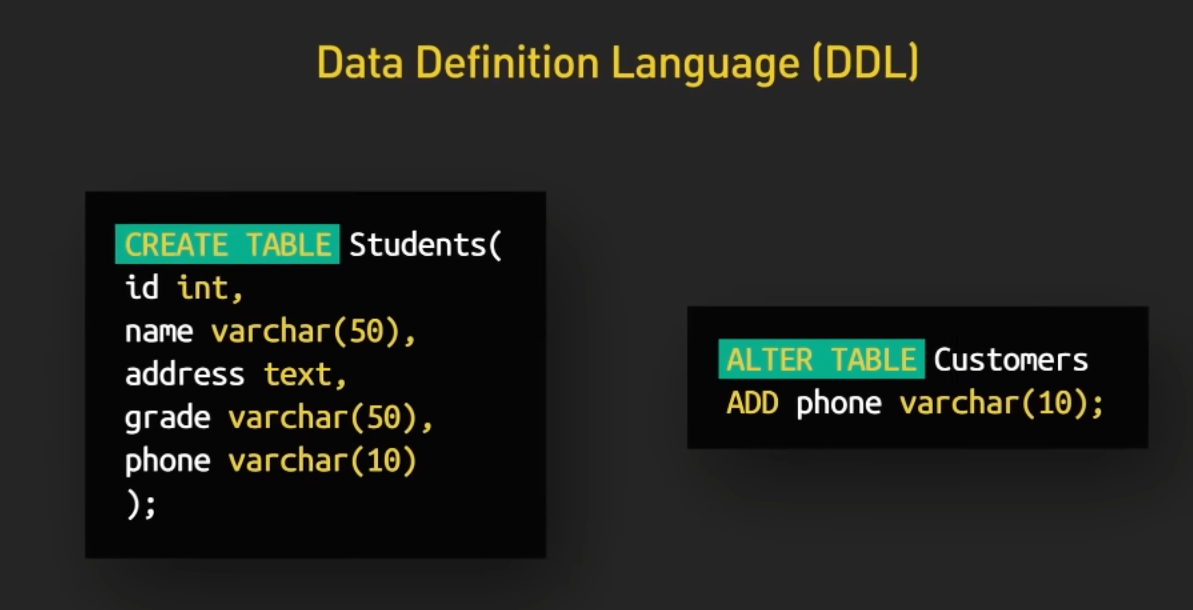

#### `CREATE`

- The `CREATE` command is used to create new database objects such as `tables`, `indexes`, `views`, etc.
- This command creates a new `table` named `Employees` with columns `EmployeeID`, `FirstName`, `LastName`, and `Department`.

    ```sql
    CREATE TABLE Employees (
        EmployeeID INT PRIMARY KEY,
        FirstName VARCHAR(50),
        LastName VARCHAR(50),
        Department VARCHAR(50)
    );
    ```

#### `ALTER`

- The `ALTER` command is used to **modify existing database objects**.
- This command adds a new column named `Salary` to the `Employees` table.

    ```sql
    ALTER TABLE Employees
    ADD Salary DECIMAL(10, 2);
    ```

#### `DROP`

- The `DROP` command is used to **delete existing database objects**.
- This command deletes the `Employees` table and all its data from the database.

    ```sql
    DROP TABLE Employees;
    ```

#### `TRUNCATE`

- The `TRUNCATE` command is used to **delete all rows** from a table but **keeps the table structure** intact.
- This command **removes all rows** from the `Employees` table, but the table structure remains.

    ```sql
    TRUNCATE TABLE Employees;
    ```

#### `RENAME`

- The `RENAME` command is used to rename existing database objects.
- This command renames the column `FirstName` in the `Employees` table to `First_Name`.

    ```sql
    ALTER TABLE Employees
    RENAME COLUMN FirstName TO First_Name;
    ```

#### `CAST` and `::`

- The `CAST` command is used to explicitly specify the data type to which you want to convert a value.

    ```sql
    SELECT CAST('10' AS INT);
    SELECT '10'::INT; -- Same
    SELECT * FROM Employees WHERE CAST(Salary AS DECIMAL) > 50000;
    ```


### DML (Data Manipulation Language)

`DML` is used to manipulate data stored in the database. It includes commands for `inserting`, `updating`, `deleting`, and `querying` data within tables.

Common DML commands include `INSERT`, `UPDATE`, `DELETE`, and `SELECT`.


#### INSERT

- The `INSERT` command is used to add new rows to a table.

    ```sql
    CREATE TABLE Employees (
        EmployeeID SERIAL PRIMARY KEY,
        FirstName VARCHAR(50),
        LastName VARCHAR(50),
        Department VARCHAR(50),
        Salary NUMERIC(10, 2)
    );

    INSERT INTO Employees (FirstName, LastName, Department, Salary)
    VALUES 
    ('John', 'Doe', 'IT', 75000),
    ('Jane', 'Smith', 'HR', 65000),
    ('Alice', 'Johnson', 'Finance', 80000);
    ```

- Output Table:

    | EmployeeID | FirstName | LastName | Department | Salary   |
    |------------|-----------|----------|------------|----------|
    | 1          | John      | Doe      | IT         | 75000.00 |
    | 2          | Jane      | Smith    | HR         | 65000.00 |
    | 3          | Alice     | Johnson  | Finance    | 80000.00 |

#### UPDATE

- The `UPDATE` command is used to modify existing rows in a table.

    ```sql
    UPDATE Employees
    SET Salary = 85000
    WHERE EmployeeID = 1;
    ```

- Output Table:

    | EmployeeID | FirstName | LastName | Department | Salary   |
    |------------|-----------|----------|------------|----------|
    | 1          | John      | Doe      | IT         | 85000.00 |
    | 2          | Jane      | Smith    | HR         | 65000.00 |
    | 3          | Alice     | Johnson  | Finance    | 80000.00 |

#### DELETE

- The `DELETE` command is used to remove rows from a table.

    ```sql
    DELETE FROM Employees
    WHERE EmployeeID = 2;
    ```

- Output Table:

    | EmployeeID | FirstName | LastName | Department | Salary   |
    |------------|-----------|----------|------------|----------|
    | 1          | John      | Doe      | IT         | 85000.00 |
    | 3          | Alice     | Johnson  | Finance    | 80000.00 |

#### SELECT

- The `SELECT` command is used to query data from a table.

    ```sql
    SELECT * FROM Employees;
    ```

- Output Table:

    | EmployeeID | FirstName | LastName | Department | Salary   |
    |------------|-----------|----------|------------|----------|
    | 1          | John      | Doe      | IT         | 85000.00 |
    | 3          | Alice     | Johnson  | Finance    | 80000.00 |
````

### Operators

In `SQL`, operators are used to perform operations on data within queries. There are various types of operators in `SQL`, including `arithmetic operators`, `comparison operators`, `logical operators`, and more. Here's an introduction to some common SQL operators with examples:

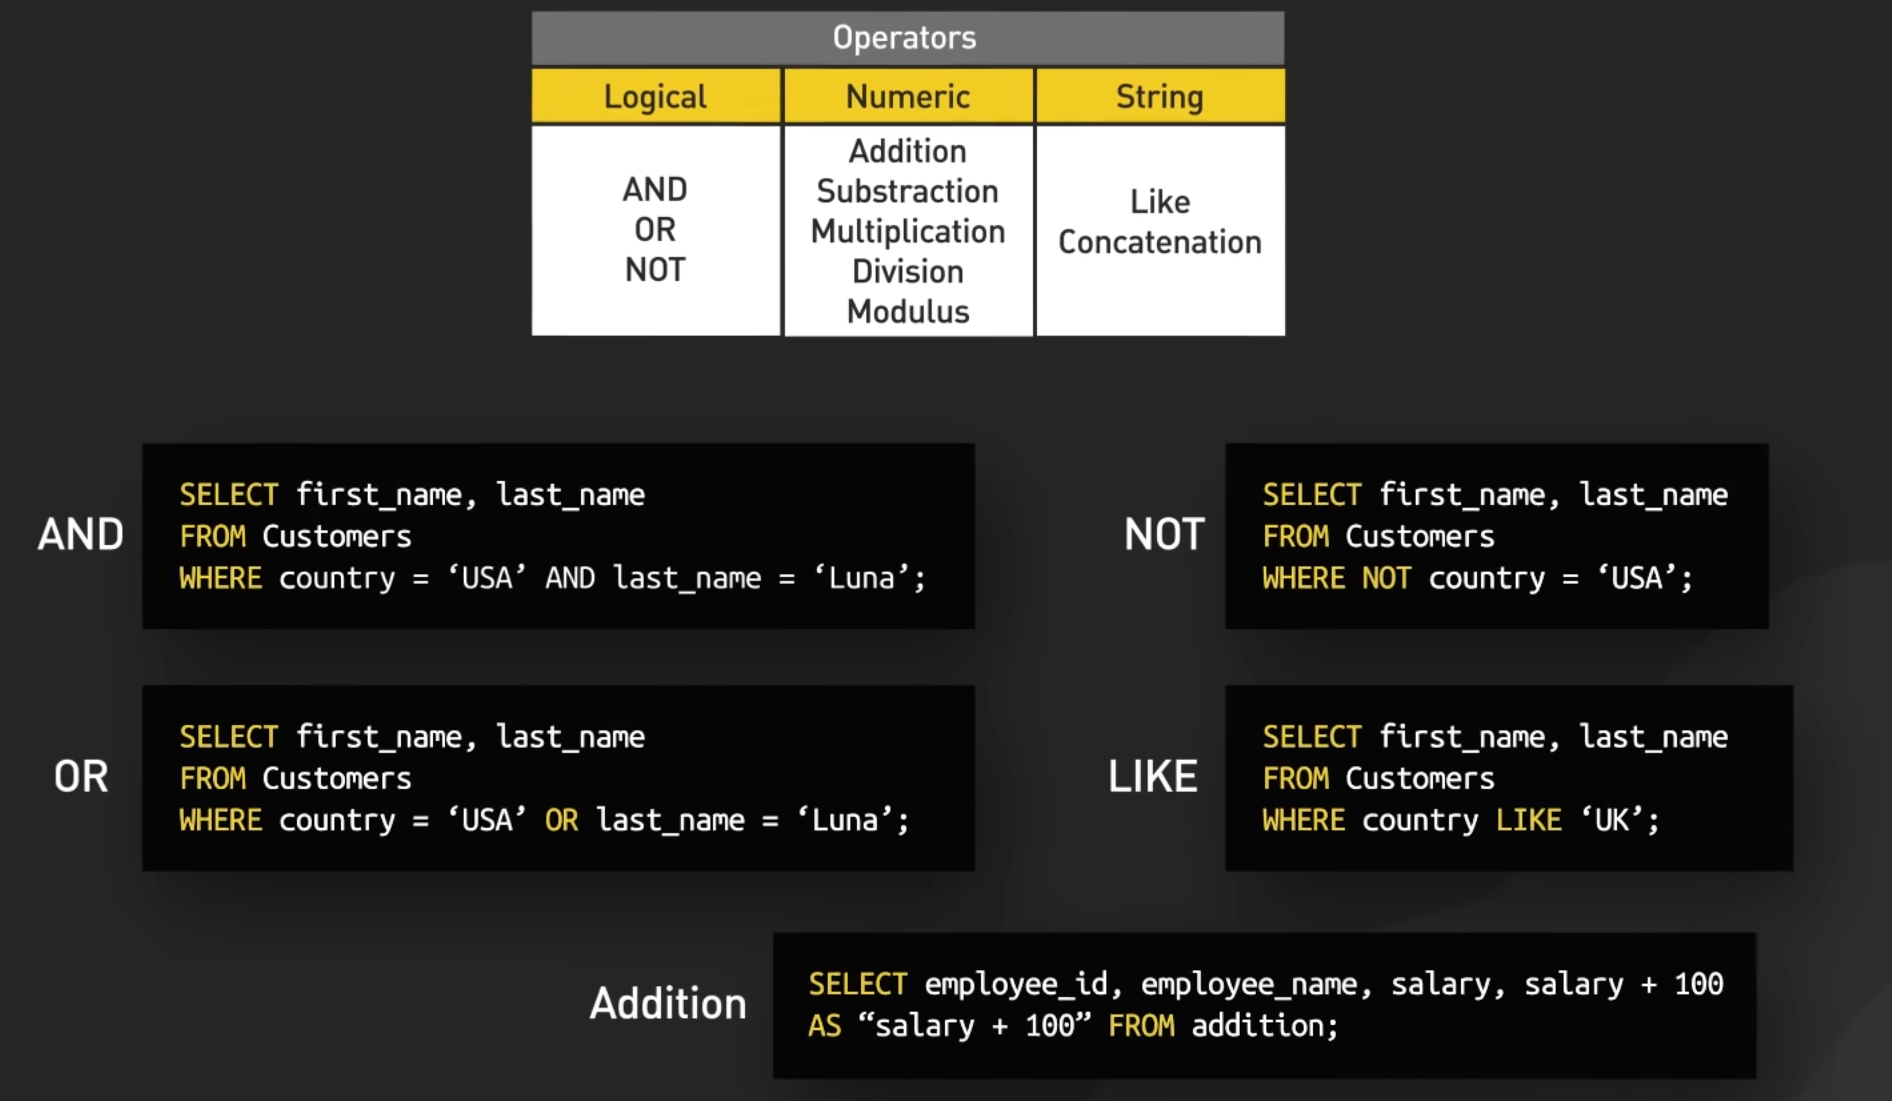

### Arithmetic Operators

- Addition (`+`), Subtraction (`-`), Multiplication (`*`), Division (`/`), and Modulus (`%`).

```sql
SELECT 
    10 + 5 AS Addition, 
    10 - 5 AS Subtraction, 
    10 * 5 AS Multiplication, 
    10 / 5 AS Division, 
    10 % 3 AS Modulus;

```

#### Comparison Operators

Equal to (`=`), Not equal to (`<>` or `!=`), Greater than (`>`), Less than (`<`), Greater than or equal to (`>=`), Less than or equal to (`<`=).

  ```sql
  SELECT * FROM Products WHERE Price > 100;
  ```

#### `CONCAT` and `SUBSTRING` Operator

Concatenates two or more strings together.

  ```sql
  SELECT CONCAT(FirstName, ' ', LastName) AS FullName FROM Customers;
  -- OR using ||
  SELECT FirstName || ' ' || LastName AS FullName FROM Customers;
  ```

  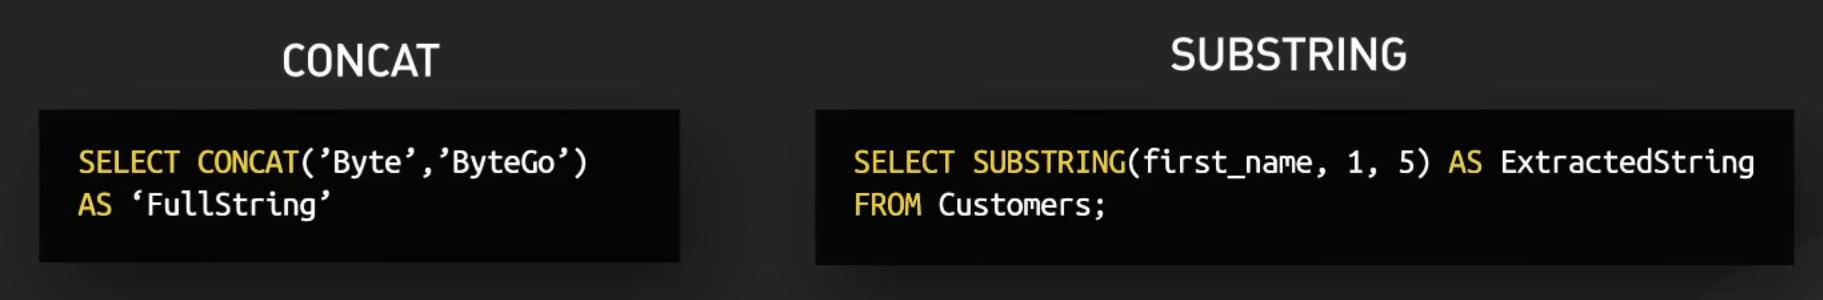

#### `IN` Operator

Checks if a value matches any value in a list.

  ```sql
  SELECT * FROM Products WHERE Category IN ('Electronics', 'Appliances');
  ```

#### `BETWEEN` Operator

Checks if a value is within a specified range.

  ```sql
  SELECT * FROM Orders WHERE OrderDate BETWEEN '2022-01-01' AND '2022-01-31';
  ```

#### `LIKE` Operator

Compares a value to similar values using `wildcard` characters (`%` for zero or more characters, `_` for a single character).

  ```sql
  SELECT * FROM Products WHERE ProductName LIKE 'Apple%';
  ```

#### `IS NULL` / `IS NOT NULL` Operators

Checks if a value is NULL or not NULL.

  ```sql
  SELECT * FROM Employees WHERE ManagerID IS NULL;
  SELECT * FROM Employees WHERE ManagerID IS NOT NULL;
  ```

#### `ANY` / `ALL` Operators

- The `ANY` operator returns `true` if the comparison is `true` for **at least one** of the values returned by the subquery.
  ```sql
  SELECT * FROM Products WHERE Price > ANY (SELECT Price FROM SpecialOffers);
  ```
  - This query selects all `Products` with a `Price` greater than any `Price` listed in the `SpecialOffers` table.
  
- The `ALL` operator returns `true` if the comparison is `true` for **all** the values returned by the subquery.
  ```sql
  SELECT * FROM Orders WHERE TotalAmount > ALL (SELECT Budget FROM Departments WHERE DepartmentName = 'Sales');
  ```
  - This query selects all `orders` with a `TotalAmount` greater than the `Budget` of the Sales department.


## Answer GIS Related Questions Using SQL

### Which Census Tract Has the Most Population?
To find the census tract with the highest population:

```sql
SELECT GISJOIN, GEO_ID, AQNFE001 AS total_population
FROM nhgis_tract_data
ORDER BY AQNFE001 DESC
LIMIT 1;
```

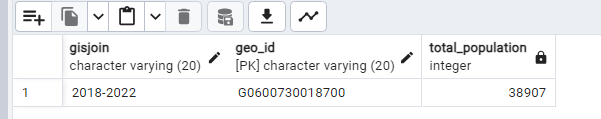


###  What Is the Average Median Household Income Across All Census Tracts?
To calculate the average median household income:

```sql
SELECT AVG(aqpke001) AS avg_median_income
FROM nhgis_tract_data
WHERE aqpke001 IS NOT NULL;
```

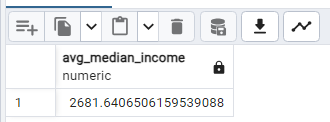

### Which Census Tract Has the Highest Percentage of Asian Population?
To determine the tract with the highest percentage of the Asian population:
```sql
SELECT GISJOIN, GEO_ID, AQNGE005, AQNFE001, 
       (AQNGE005::FLOAT / AQNFE001 * 100) AS asian_percentage
FROM nhgis_tract_data
WHERE AQNFE001 > 0 -- Ensure total population is not zero
ORDER BY asian_percentage DESC
LIMIT 1;
```

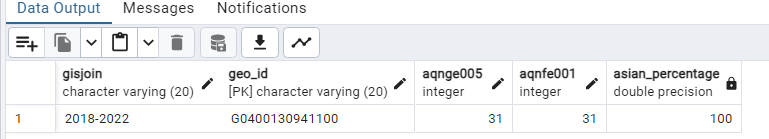

### What Are the Top 5 Census Tracts by Educational Attainment (Bachelor’s Degree)?
To identify the tracts with the most residents holding a bachelor’s degree:

```sql
SELECT GISJOIN, GEO_ID, AQPKE022 AS bachelors_degree
FROM nhgis_tract_data
ORDER BY AQPKE022 DESC
LIMIT 5;
```

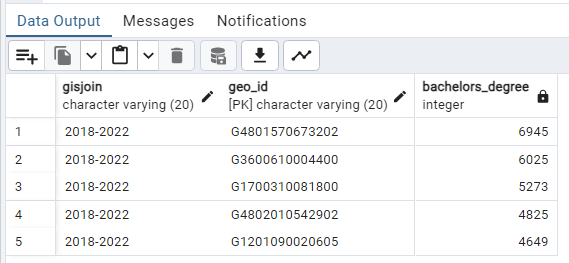

### What Is the Total Population by County?
Find Top5 total population at the county level:

```sql
SELECT COUNTY, COUNTYA, SUM(AQNFE001) AS total_population
FROM nhgis_tract_data
GROUP BY COUNTY, COUNTYA
ORDER BY total_population DESC
LIMIT 5;
```

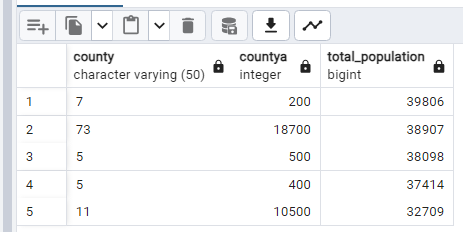

### Which Census Tracts Have More Than 80% of the Population Identifying as Asian?
To find tracts where the majority population identifies as Asian:

```sql
SELECT GISJOIN, GEO_ID, AQNGE003, AQNFE001,
       (AQNGE005::FLOAT / AQNFE001 * 100) AS asian_percentage
FROM nhgis_tract_data
WHERE AQNFE001 > 0 AND (AQNGE005::FLOAT / AQNFE001) > 0.8;
```

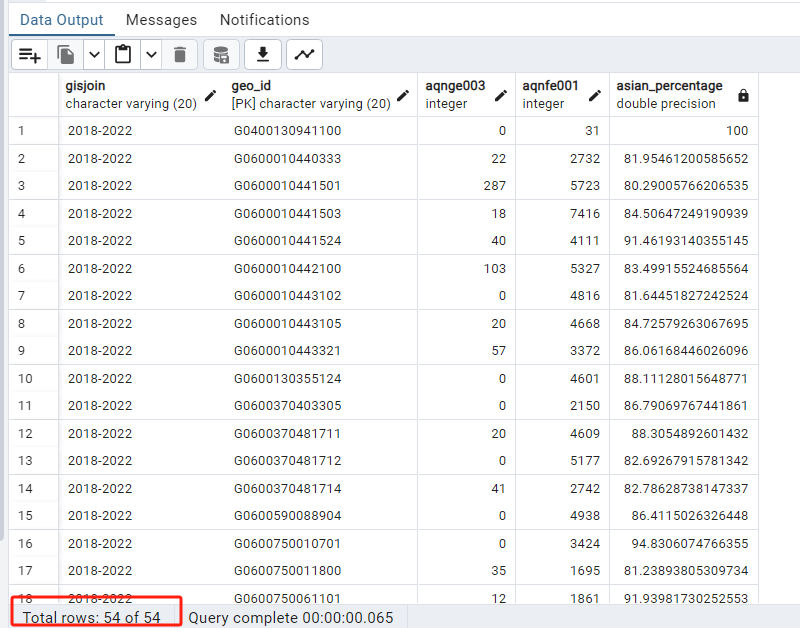